Parte 1

Inciso 2 

In [1]:
#Importamos la base de datos
import pandas as pd
df = pd.read_excel("usu_individual_T123.xlsx")
print(df.head(5))

                          CODUSU  ANO4  TRIMESTRE  NRO_HOGAR  COMPONENTE  H15  \
0  TQRMNORVWHLMKOCDEOHCH00720228  2023          1          1           5    0   
1  TQRMNOPSTHKMKPCDEOHCH00781447  2023          1          1           1    1   
2  TQRMNOQSXHMOKRCDEOHCH00803177  2023          1          1           1    1   
3  TQRMNOQSXHMOKRCDEOHCH00803177  2023          1          1           2    1   
4  TQRMNOQYTHMNKSCDEOHCH00803178  2023          1          1           1    1   

   REGION MAS_500  AGLOMERADO  PONDERA  ...  PDECIFR  ADECIFR      IPCF  \
0      44       N          91      112  ...     10.0        9   79700.0   
1      44       N          91      190  ...      6.0        5  180000.0   
2      44       N          91      134  ...      8.0        8  145000.0   
3      44       N          91      134  ...      8.0        8  145000.0   
4      44       N          91      120  ...     12.0       12       0.0   

   DECCFR  IDECCFR  RDECCFR  GDECCFR  PDECCFR  ADECCFR  PONDIH

In [2]:
#Inciso a): eliminamos las observaciones que no pertenezcan a CABA o GBA
df_aglomerados = df[(df["AGLOMERADO"]==32)|(df["AGLOMERADO"]==33)]
#Chequeamos el data frame 
print(df_aglomerados.head(15))

                            CODUSU  ANO4  TRIMESTRE  NRO_HOGAR  COMPONENTE  \
102  TQRMNORUYHLMSMCDEIJAH00719364  2023          1          1           1   
103  TQRMNORUYHLMSMCDEIJAH00719364  2023          1          1           2   
104  TQRMNOSRQHJNSOCDEIJAH00802640  2023          1          1           1   
105  TQRMNOSRQHJNSOCDEIJAH00802640  2023          1          1           2   
106  TQRMNOSRQHJNSOCDEIJAH00802640  2023          1          1           3   
107  TQRMNOSWQHJLQRCDEIJAH00796254  2023          1          1           1   
108  TQRMNOSWQHJLQRCDEIJAH00796254  2023          1          1           2   
181  TQRMNOPYVHLMRLCDEIJAH00719346  2023          1          1           1   
182  TQRMNOPYVHLMRLCDEIJAH00719346  2023          1          1           2   
183  TQRMNOPYVHLMRLCDEIJAH00719346  2023          1          1           3   
278  TQRMNOTTTHKNLSCDEIIAD00780051  2023          1          1           1   
279  TQRMNOSRXHKMLUCDEIIAD00780093  2023          1          1  

In [3]:
#Inciso b): descartamos las observaciones con valores absurdos 
df_aglomerados = df_aglomerados[(df_aglomerados["ITF"]>=0) & (df_aglomerados["IPCF"]>=0) & (df_aglomerados["P21"]>=0) & (df_aglomerados["P47T"]>=0) & (df_aglomerados["CH06"]>=0)]

Mujeres    3175
Varones    2784
Name: CH04, dtype: int64


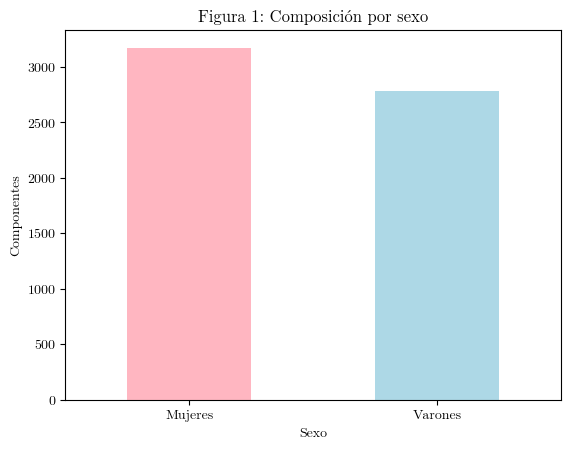

In [38]:
#Inciso c): realizamos un gráfico de barras mostrando la composición por sexo
import matplotlib.pyplot as plt
font = {'family': 'Latin Modern Math'}
plt.rc('font', **font)
#Creamos un data frame auxiliar para graficar 
sexo_labels = {1:"Varones", 2:"Mujeres"}
sexo_counts = df_aglomerados["CH04"].map(sexo_labels).value_counts()
print(sexo_counts.head(5))
#Realizamos el gráfico
ax = sexo_counts.plot(kind="bar", title= "Composición por sexo")
ax.set_xlabel("Sexo")
ax.set_ylabel("Componentes")
colores = ['lightpink', 'lightblue']
ax = sexo_counts.plot(kind="bar", title="Figura 1: Composición por sexo", color=colores)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.savefig("sexo.png", dpi=300, bbox_inches='tight')




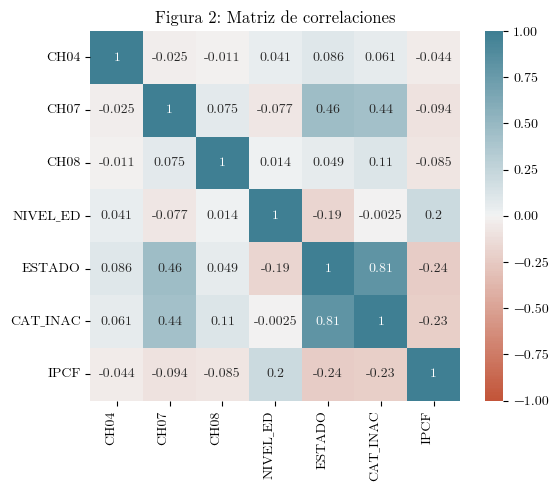

In [35]:
#Inciso d): Realizamos una matriz de correlación
import seaborn as sns
import numpy as np 
#Creamos un data frame con las variables que luego van a estar en la matriz de correlación
df_d = df_aglomerados[["CH04", "CH07", "CH08", "NIVEL_ED", "ESTADO", "CAT_INAC", "IPCF"]].copy()


corr = df_d.corr()
ax = sns.heatmap(
    corr, 
    annot=True, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right',
    fontsize=10
)
plt.title("Figura 2: Matriz de correlaciones")
plt.savefig("heatmap.png", dpi=300, bbox_inches='tight')


In [20]:
#Inciso e): contamos la cantidad de desocupados e inactivos en la muestra 
ocupacion_counts = df_aglomerados["ESTADO"].value_counts()
print(ocupacion_counts)
#Resultados: tenemos en nuestra base de datos a 264 personas desocupadas y 2540 personas inactivas

#Calculamos el ingreso per cápita familiar promedio por estado ocupacional
promedio_por_ocupacion = df.groupby("ESTADO")["IPCF"].mean()
print(promedio_por_ocupacion)


3    2540
1    2254
4     901
2     264
Name: ESTADO, dtype: int64
ESTADO
0        0.000000
1    62718.814308
2    32263.560711
3    49957.566475
4    40113.265974
Name: IPCF, dtype: float64


In [209]:
#Inciso f): trabajamos la base de datos "tabla_adultos_equiv.xlsx" como indica la consigna
df_adultos = pd.read_excel("tabla_adulto_equiv.xlsx",skiprows=3,nrows=24) 
df_adultos.drop(0, inplace = True)

#Reseteamos el índice 
df_adultos.reset_index(drop=True,inplace=True)
display(df_adultos)

#Definimos las unidades de adulto equivalente para las edades que están agrupadas 
for i in range(0,18):
    df_adultos.loc[i,"Edad"]= i 
#De 18 a 29 años le atribuímos el valor 0.76 a las mujeres y 1.02 a los hombres
for i in range(18,30): 
    df_adultos.loc[i]= [i,0.76,1.02] 
#De 30 a 45 años le atribuímos el valor 0.77 a las mujeres y 1 a los hombres
for i in range(30,46): 
    df_adultos.loc[i]= [i,0.77,1] 
#De 46 a 60 años le atribuímos el valor 0.76 a las mujeres y 1 a los hombres
for i in range(46,61):
    df_adultos.loc[i]= [i,0.76,1] 
#De 61 a 75 años le atribuímos el valor 0.67 a las mujeres y 0.83 a los hombres
for i in range(61,76): 
    df_adultos.loc[i]= [i,0.67,0.83]
#A los mayores de 75 años le atribuímos el valor 0.63 a las mujeres y 0.74 a los hombres
for i in range(76,106): 
    df_adultos.loc[i]= [i,0.63,0.74] 

df_adultos = df_adultos.rename(columns={"Edad":"CH06"})
print(df_adultos)

#Armamos una base de datos para las mujeres y otras para los varones
df_equiv_mujeres = df_adultos[["CH06","Mujeres"]].copy()
df_equiv_mujeres["CH04"] = 2 #El 2 implica que son mujeres según la variable CH04 de la EPH
df_equiv_mujeres = df_equiv_mujeres.rename(columns={"Mujeres":"adulto_equiv"})
display(df_equiv_mujeres)

df_equiv_varones = df_adultos[["CH06","Varones"]].copy()
df_equiv_varones["CH04"] = 1 #El 1 implica que son varones según la variable CH04 de la EPH
df_equiv_varones = df_equiv_varones.rename(columns={"Varones":"adulto_equiv"})
display(df_equiv_varones)

#Unimos las dos bases creadas anteriormente. Luego juntamos la nueva base con la EPH
df_equiv_total = df_equiv_mujeres.append(df_equiv_varones)
display(df_equiv_total)
df_aglomerados_merge = df_aglomerados.merge(df_equiv_total, on=["CH06","CH04"], how = "left")
#Chequeamos que haya dado bien
print(df_aglomerados_merge[["CH06","CH04","adulto_equiv"]].head(10))

#Sumamos la nueva columna "adulto_equiv" para todas las personas que pertenecen al mismo hogar
df_aglomerados_suma = df_aglomerados_merge.groupby(["NRO_HOGAR","CODUSU"]).agg({"adulto_equiv":"sum"})
df_aglomerados_suma.reset_index(inplace = True)
df_aglomerados_suma = df_aglomerados_suma.rename(columns={"adulto_equiv":"ad_equiv_hogar"})
df_aglomerados_final = df_aglomerados_merge.merge(df_aglomerados_suma, on=["NRO_HOGAR","CODUSU"], how = "left")

,Edad,Mujeres,Varones
0,Menor de 1 año,0.35,0.35
1,1año,0.37,0.37
2,2 años,0.46,0.46
3,3 años,0.51,0.51
4,4 años,0.55,0.55
5,5 años,0.60,0.60
6,6 años,0.64,0.64
7,7 años,0.66,0.66
8,8 años,0.68,0.68
9,9 años,0.69,0.69


      CH06  Mujeres  Varones
0        0     0.35     0.35
1        1     0.37     0.37
2        2     0.46     0.46
3        3     0.51     0.51
4        4     0.55     0.55
..     ...      ...      ...
101  101.0     0.63     0.74
102  102.0     0.63     0.74
103  103.0     0.63     0.74
104  104.0     0.63     0.74
105  105.0     0.63     0.74

[106 rows x 3 columns]


,CH06,adulto_equiv,CH04
0,0,0.35,2
1,1,0.37,2
2,2,0.46,2
3,3,0.51,2
4,4,0.55,2
...,...,...,...
101,101.0,0.63,2
102,102.0,0.63,2
103,103.0,0.63,2
104,104.0,0.63,2


,CH06,adulto_equiv,CH04
0,0,0.35,1
1,1,0.37,1
2,2,0.46,1
3,3,0.51,1
4,4,0.55,1
...,...,...,...
101,101.0,0.74,1
102,102.0,0.74,1
103,103.0,0.74,1
104,104.0,0.74,1


,CH06,adulto_equiv,CH04
0,0,0.35,2
1,1,0.37,2
2,2,0.46,2
3,3,0.51,2
4,4,0.55,2
...,...,...,...
101,101.0,0.74,1
102,102.0,0.74,1
103,103.0,0.74,1
104,104.0,0.74,1


  CH06  CH04  adulto_equiv
0   65     2          0.67
1   70     1          0.83
2   36     1          1.00
3   28     2          0.76
4    9     2          0.69
5   59     1          1.00
6   55     1          1.00
7   18     1          1.02
8   44     1          1.00
9   10     2          0.70


Inciso 3

In [210]:
#Encontramos a las personas que no respondieron cual es su ITF y los diferenciamos en otra base de datos
cantidad_missing = (df_aglomerados_final["ITF"] == 0).sum()
print("La cantidad de personas que no reportaron su ITF es",cantidad_missing)
#Hacemos una base con las personas que reportaron su ITF y otra con las que no lo hicieron
respondieron = df_aglomerados_final[df_aglomerados_final["ITF"]!= 0]
norespondieron = df_aglomerados_final[df_aglomerados_final["ITF"]== 0]
#Chequeamos que los dataframes se hayan creado correctamente y reseteamos su índice
respondieron.reset_index(inplace = True)
norespondieron.reset_index(inplace = True)
print(respondieron["ITF"].head(5))
print(norespondieron["ITF"].head(5))

La cantidad de personas que no reportaron su ITF es 1778
0    135000
1    135000
2     70000
3     70000
4     70000
Name: ITF, dtype: int64
0    0
1    0
2    0
3    0
4    0
Name: ITF, dtype: int64


Inciso 4

In [211]:
#Agregamos la columna de "ingreso necesario" al Data Frame de "respondieron"
respondieron["ingreso_necesario"] = respondieron["ad_equiv_hogar"]*(57371.05)



/var/folders/cp/pmnjgwl55pjcdvq86hkcnsgm0000gn/T/ipykernel_85387/3006038328.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron["ingreso_necesario"] = respondieron["ad_equiv_hogar"]*(57371.05)


Inciso 5

In [212]:
#Generamos una columna nueva llamada "pobre" para identificar a aquellos que no alcanzan el ingreso necesario
respondieron["pobre"] = (respondieron["ITF"] < respondieron["ingreso_necesario"]).astype(int)
print(respondieron[["ITF","ingreso_necesario","pobre"]])

#Contamos el número de pobres que hay en el Data Frame "respondieron"
cantidad_pobres = respondieron["pobre"].value_counts()
cantidad_pobres = cantidad_pobres.get(1, 0)
print("La cantidad de pobres es",cantidad_pobres)

         ITF  ingreso_necesario  pobre
0     135000         86056.5750      0
1     135000         86056.5750      0
2      70000        140559.0725      1
3      70000        140559.0725      1
4      70000        140559.0725      1
...      ...                ...    ...
4176  155000        219157.4110      1
4177  480000        141132.7830      0
4178  480000        141132.7830      0
4179  480000        141132.7830      0
4180  254000         36143.7615      0

[4181 rows x 3 columns]
La cantidad de pobres es 1555


/var/folders/cp/pmnjgwl55pjcdvq86hkcnsgm0000gn/T/ipykernel_85387/2935682553.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron["pobre"] = (respondieron["ITF"] < respondieron["ingreso_necesario"]).astype(int)


Parte 2

Inciso 1

In [213]:
#Eliminamos todas las variables relacionadas a ingresos de las dos bases de datos 
columnas_ingresos = ["P21","PP08D1","PP08D4","PP08F1","PP08F2","PP08J1","PP08J2","PP08J3","DECOCUR","IDECOCUR","RDECOCUR","GDECOCUR","PDECOCUR","ADECOCUR","PONDIIO","TOT_P12","P47T","DECINDR","IDECINDR","RDECINDR","GDECINDR","PDECINDR","ADECINDR","PONDII","V2_M","V3_M","V4_M","V5_M","V8_M","V9_M","V10_M","V11_M","V12_M","V18_M","V21_M","V19_AM","T_VI","ITF","DECIFR","IDECIFR","RDECIFR","GDECIFR","PDECIFR","ADECIFR","IPCF","DECCFR","IDECCFR","RDECCFR","GDECCFR","ADECCFR","PDECCFR","PONDIH"]
respondieron_2 = respondieron.drop(columnas_ingresos, axis=1)
norespondieron_2 = norespondieron.drop(columnas_ingresos, axis=1)
#Eliminar columnas adulto_equiv, ad_equiv_hogar e ingreso_necesario
respondieron_2 = respondieron_2.drop(["adulto_equiv","ad_equiv_hogar","ingreso_necesario"], axis=1)
norespondieron_2 = norespondieron_2.drop(["adulto_equiv","ad_equiv_hogar"], axis=1)

Inciso 2

In [219]:
#Partimos la base "respondieron" en una parte de entrenamiento y otra parte de prueba
import statsmodels.api as sm
y = respondieron_2["pobre"]
x = respondieron_2[respondieron_2.columns.drop("pobre")]
x = sm.add_constant(x)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x.loc[:,x.columns!="const"],y,test_size=0.3,random_state=201)
#Chequeamos la partición de las bases de prueba y entrenamiento
print("La base x de prueba tiene el",round(len(x_test)/len(respondieron_2)*100), "% de los datos") 
print("La base x de entrenamiento tiene el", round(len(x_train)/len(respondieron_2)*100),  "% de los datos")  
print("La base y de prueba tiene el",round(len(y_test)/len(respondieron_2)*100), "% de los datos") 
print("La base y de entrenamiento tiene el", round(len(y_train)/len(respondieron_2)*100),  "% de los datos")

La base x de prueba tiene el 30 % de los datos
La base x de entrenamiento tiene el 70 % de los datos
La base y de prueba tiene el 30 % de los datos
La base y de entrenamiento tiene el 70 % de los datos


/Users/solanacucher/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Inciso 3

In [ ]:
#Realizamos la curva ROC y los valores de AUC y de Accuracy. Luego computamos la matriz de confusión.
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score

#Logistic Regression (Logit)
logit = LogisticRegression()
logit.fit(X_train, y_train)
y_logit = logit.predict(X_test)

#Linear Discriminant Analysis (LDA)
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_lda = lda.predict(X_test)

#k-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_knn = knn.predict(X_test)